In [6]:

import skimage
from os import listdir
from os.path import isfile, join
from visualization import ishow

from SATMean import sat_mean
from SATMedian import sat_median
from SAT_ISBI import sat_ISBI
from GEMS import apply_GEMSp as apply_GEMS
from MV import apply_MV_PY, apply_MV_sitk
from STAPLE import apply_STAPLE_sitk
from KarcherMean import apply_KM
from RBF import apply_RBF
import matplotlib.pyplot as plt

In [7]:
# show array of images
def ishow_titles(imgs, titles):
    figSize=60
    fig=plt.figure(figsize=(figSize, figSize/2))
    columns = 5
    rows = int(len(imgs)/columns)
    if (len(imgs)%columns!=0):
        rows=rows+1
    for i in range(0, len(imgs)):
        sub = fig.add_subplot(rows, columns, i+1)
        sub.set_title(titles[i], fontdict={'fontsize': 50, 'fontweight': 'medium'})
        # im = imgs[i][imgs[i]>0]
        plt.imshow(imgs[i])#,cmap='gray')
    plt.show()

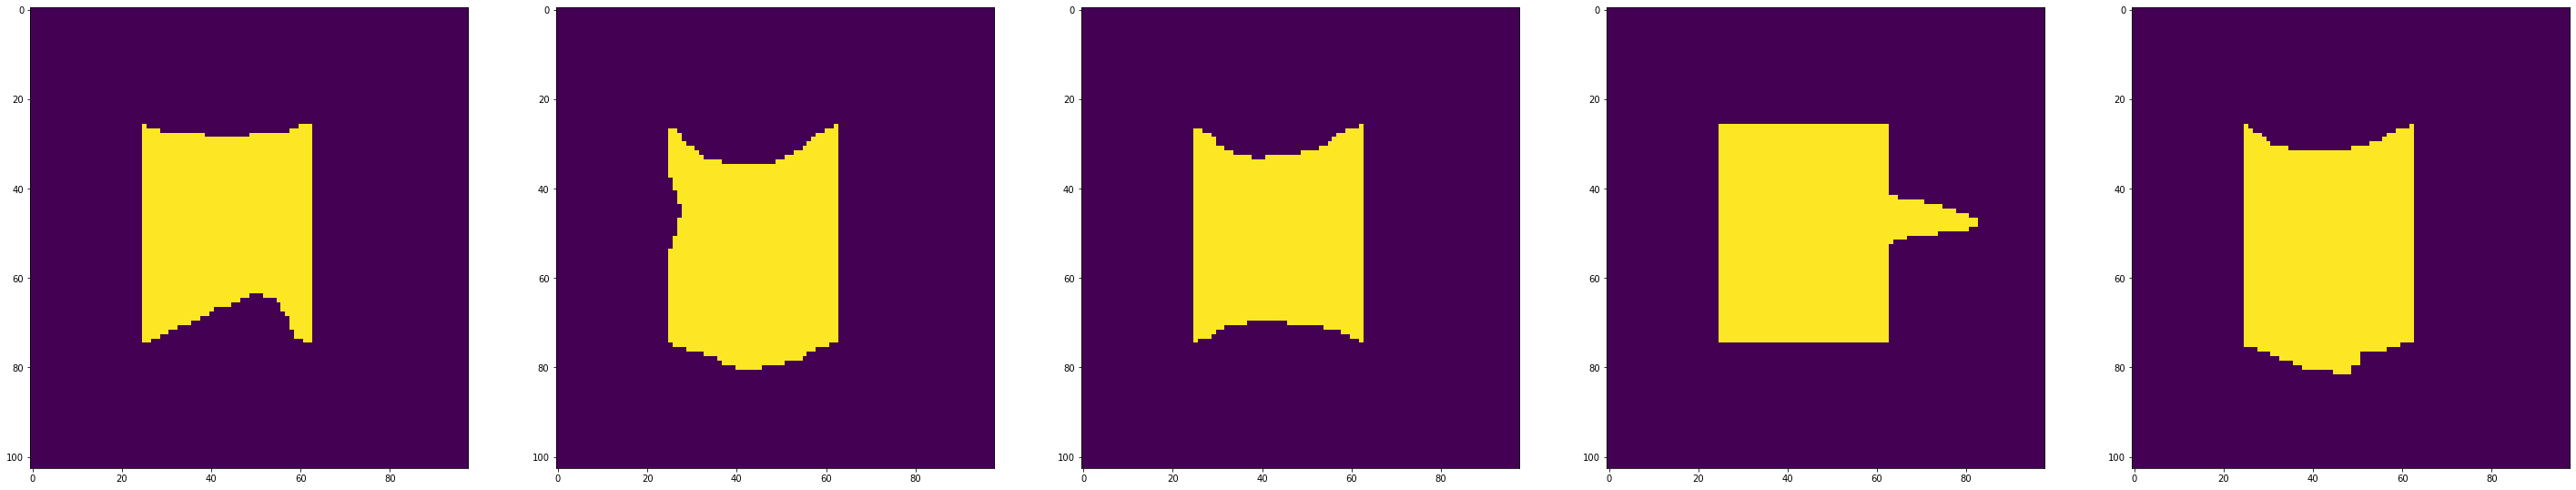

In [8]:
path = 'example_images/scheme/'
file_names = [f for f in listdir(path) if isfile(join(path, f)) and f.endswith(".tif")]
img_list = []
for file_name in file_names:
    img = skimage.io.imread(fname=path + file_name, as_gray=True);
    skimage.io.imsave(fname=path +'/' + file_name[:-4] + '.tif', arr=img, check_contrast=False)
    img_list.append(img)
ishow(img_list)

 /home/alex/PycharmProjects/SAT_latest/SATMean.py:372: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.


Algorithm converged

Algorithm converged

max=  200
Computing Karcher Mean of 5 curves in SRVF space..
updating step: 1
updating step: 2
updating step: 3
updating step: 4
updating step: 5
updating step: 6


 /home/alex/PycharmProjects/SAT_latest/SAT_ISBI.py:372: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/alex/PycharmProjects/SAT_latest/GEMS.py:62: FutureWarning:indices argument is deprecated and will be removed in version 0.20. To avoid this warning, please do not use the indices argument. Please see peak_local_max documentation for more details.


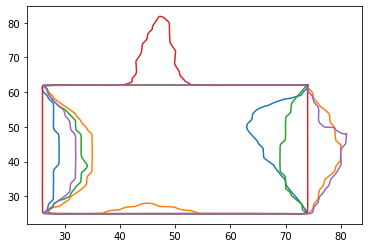

In [11]:
sat_mean_result = sat_mean(False, img_list, 5, 20)
sat_median_result = sat_median(False, img_list, 5, 20)
mv_py_result = apply_MV_PY(img_list)
mv_sitk_result = apply_MV_sitk(img_list)
staple_result = apply_STAPLE_sitk(img_list)
mask_parfusion = apply_RBF(img_list, 0.8)
mask_parfusion_05 = apply_RBF(img_list, 0.5)
km_result = apply_KM(img_list, False)
mask_isbi = sat_ISBI(False, img_list, 5, 20)

rad_t = 5
mask_gems = apply_GEMS(img_list, rad_t, False)

sat_mean_result[sat_mean_result > 0]=1
sat_median_result[sat_median_result > 0]=1
img_list[0][img_list[0] > 0]=1


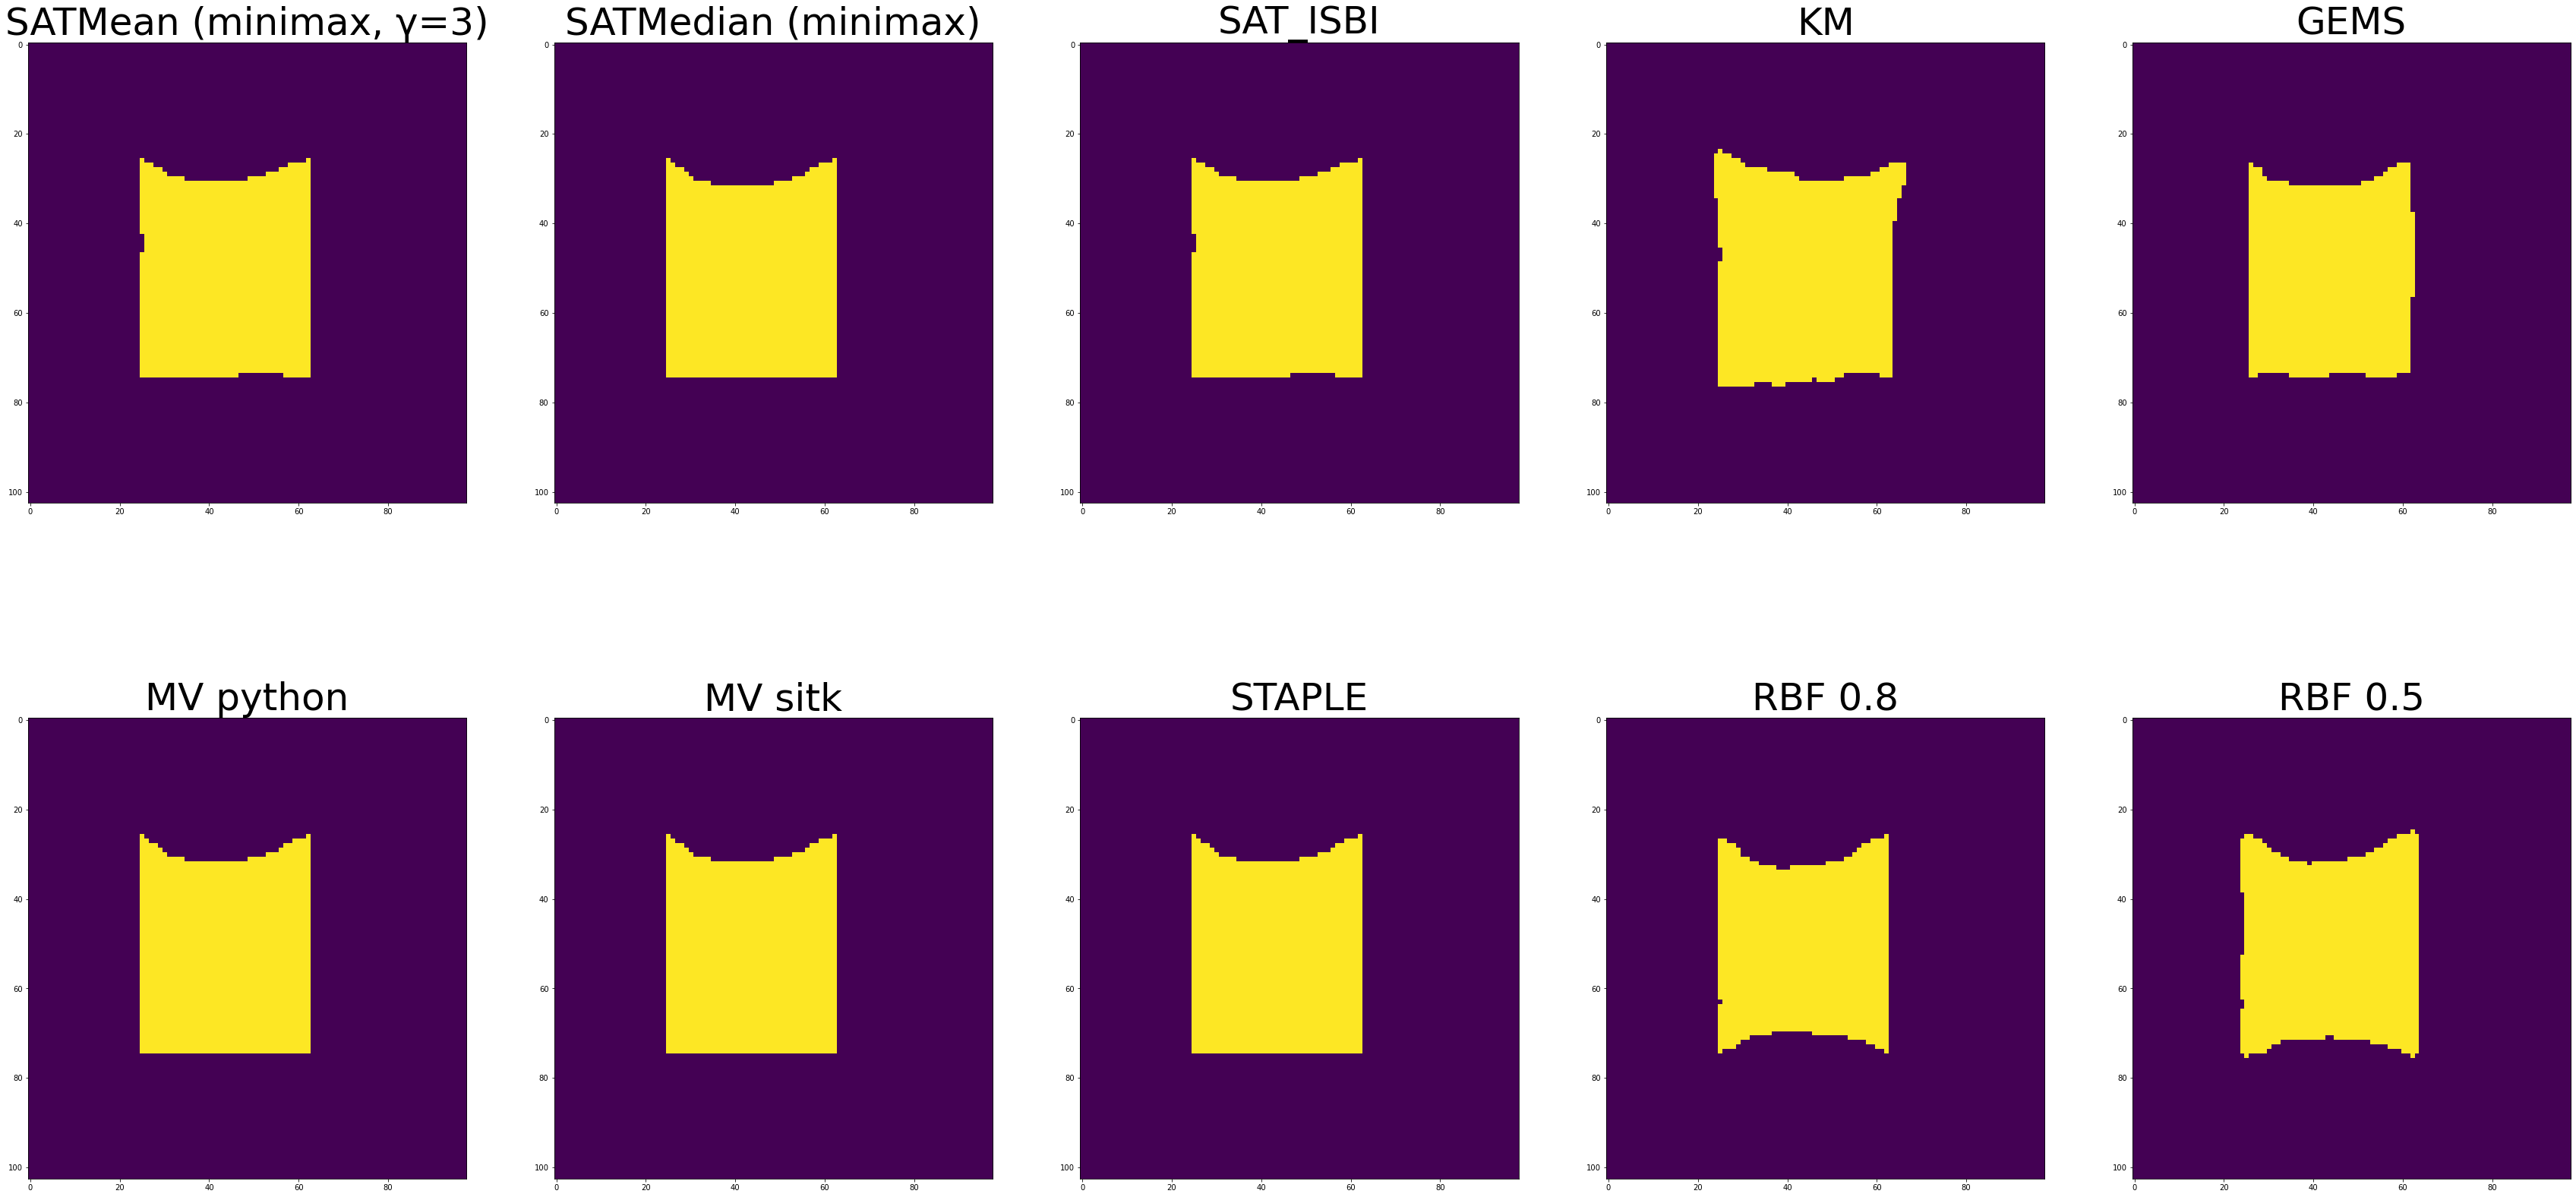

In [13]:
ishow_titles([sat_mean_result, sat_median_result, mask_isbi, km_result, mask_gems,
              mv_py_result, mv_sitk_result, staple_result,  mask_parfusion, mask_parfusion_05],
      ['SATMean (minimax, γ=3)', 'SATMedian (minimax)', 'SAT_ISBI', 'KM',  'GEMS',
       'MV python', 'MV sitk', 'STAPLE',  'RBF 0.8', 'RBF 0.5'])